In [20]:
!pip install tensorflow numpy matplotlib

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1 (helps the model learn faster)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to include a channel dimension (Grayscale = 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [23]:
model = models.Sequential([
    # First Convolutional Layer: Extracts 32 features
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), # Reduces size to focus on important parts

    # Second Convolutional Layer: Extracts 64 features
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening the 2D data into 1D to feed into the final classifier
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Final Layer: 10 neurons (one for each digit 0-9)
    layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training for 5 epochs (passes through the data)
print("Starting training...")
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9023 - loss: 0.3113 - val_accuracy: 0.9858 - val_loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9885 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9907 - loss: 0.0311 - val_accuracy: 0.9906 - val_loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9949 - loss: 0.0176 - val_accuracy: 0.9909 - val_loss: 0.0320


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Save the model so you can use it later in other projects
model.save('mnist_model.h5')
print("Model saved as mnist_model.h5")

313/313 - 1s - 2ms/step - accuracy: 0.9932 - loss: 0.0202



Test Accuracy: 0.9932
Model saved as mnist_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Predicted Digit: 0
Actual Label: 0


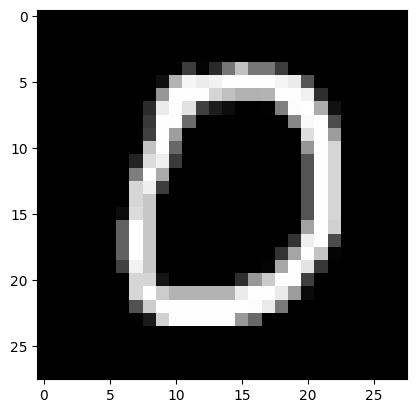

In [26]:
# Select an image from the test set
img_index = 10
img = test_images[img_index].reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")
print(f"Actual Label: {test_labels[img_index]}")

# Show the image
plt.imshow(test_images[img_index].reshape(28, 28), cmap='gray')
plt.show()

In [27]:
!pip install streamlit pillow numpy tensorflow

In [28]:
!npm  install localtunnel


⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

In [29]:
!pip install streamlit

In [30]:
!pip install pyngrok streamlit --quiet

In [31]:
from pyngrok import ngrok
import os

# 1. Authenticate (Only need to do this once)
NGROK_TOKEN ="37cECX8Ze2KCLEfcljc50o4uUiu_6Qqa3DBTAQRyfDMB6uJWJ"
ngrok.set_auth_token(NGROK_TOKEN)

# 2. Run Streamlit in the background
# This command starts your app.py without blocking the rest of the notebook
os.system("nohup streamlit run app.py --server.port 8501 &")

# 3. Create a tunnel to port 8501
public_url = ngrok.connect(8501)
print(f"Your Streamlit App is live at: {public_url.public_url}")

Your Streamlit App is live at: https://unmountable-ferociously-kyrie.ngrok-free.dev
